<a href="https://colab.research.google.com/github/Ghatazhak/Capstone/blob/main/emailclasser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Classer
 A machine learning program that classifies emails as either spam or not spam. It uses a decision tree algorithm to determine whether an email is spam or not spam.


The model accuracy is: 92.33


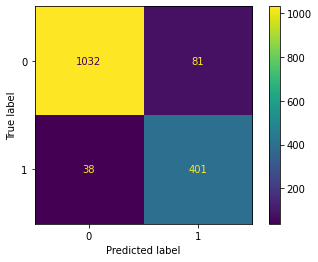

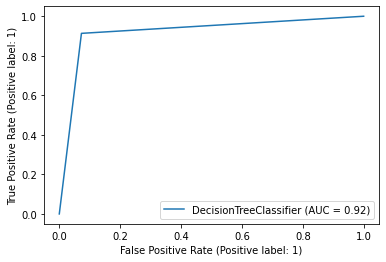

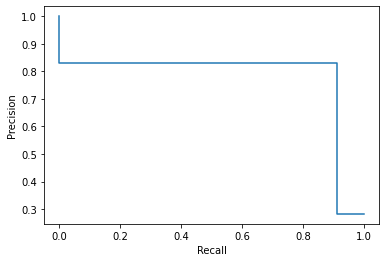

In [ ]:

from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import pandas as pd
import anvil.server
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, det_curve, DetCurveDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

anvil.server.connect("VE3VBEBUTQMHGWEL26X22BUD-HXRC6CXOSCH4HXTX")

email_df = pd.read_csv('https://raw.githubusercontent.com/Ghatazhak/Capstone/main/emails.csv')

X = email_df.drop(columns=['Email No.','Prediction']) # Removed column one and the last column.
y = email_df[['Prediction']] # Only keep the last column.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Split the data set for training and testing.

ml_model = DecisionTreeClassifier() # Decision Tree Algorithm model
ml_model.fit(X_train.values, y_train.values) # train the decision tree model.

try:
  predictions = ml_model.predict(X_test.values) # Run the test data through the model
except:
  print("Invalid Data") # This could be expanded to create a log file.


accuracy = accuracy_score(y_test, predictions) # Checking predictions of model

print('The model accuracy is: %5.2f' %(accuracy * 100))

# Confusion Matrix Implementation
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# RocCurve Implementation
disp = RocCurveDisplay.from_estimator(ml_model, X_test.values, y_test.values)

# Precision_recall_curve inmplementation
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp_prec_recall = PrecisionRecallDisplay(precision=precision, recall=recall)
disp_prec_recall.plot()

pyplot.show()

@anvil.server.callable
def test_emails():
  manual_emails = pd.read_csv('https://raw.githubusercontent.com/Ghatazhak/Capstone/main/manual_test_emails.csv')

  Xm = manual_emails.drop(columns=['Email No.','Prediction']) # Removed column

  manual_predictions = ml_model.predict(Xm.values) # Run the test data through the model.
  
  return manual_predictions


anvil.server.wait_forever()
       


# Click Link to manually run emails through system.
[Email Classification UX](https://defenseless-fluid-tanager.anvil.app)